# Crime Analytics: Visualization of Incident Reports

**==========================================================================================================**

## Project Description

In this assignment, you will analyze criminal incident data from Seattle or San Francisco to visualize patterns and, if desired, contrast and compare patterns across the two cities.

You will produce a blog-post-style visual narrative consisting of a series of visualizations interspersed with sufficient descriptive text to make a convincing argument.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Data sources used

You will use real crime data from Summer 2014 one or both of two US cities: Seattle and/or San Francisco

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Import Data

In [2]:
df = pd.read_csv("sanfrancisco_incidents_summer_2014.csv", parse_dates=["Date"])

## Data Quick Glance

In [3]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,2014-08-31,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.41,37.74,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,2014-08-31,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.44,37.76,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2014-08-31,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.41,37.78,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2014-08-31,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.49,37.77,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,2014-08-31,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.51,37.77,"(37.7723131976814, -122.509895418239)",14073422072000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28993 entries, 0 to 28992
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   IncidntNum  28993 non-null  int64         
 1   Category    28993 non-null  object        
 2   Descript    28993 non-null  object        
 3   DayOfWeek   28993 non-null  object        
 4   Date        28993 non-null  datetime64[ns]
 5   Time        28993 non-null  object        
 6   PdDistrict  28993 non-null  object        
 7   Resolution  28993 non-null  object        
 8   Address     28993 non-null  object        
 9   X           28993 non-null  float64       
 10  Y           28993 non-null  float64       
 11  Location    28993 non-null  object        
 12  PdId        28993 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 2.9+ MB


In [5]:
df.dtypes.value_counts()

object            8
int64             2
float64           2
datetime64[ns]    1
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
count,28993.00,28993,28993,28993,28993,28993,28993,28993,28993,28993.00,28993.00,28993,28993.00
unique,NaN,34,368,7,92,1379,10,16,8055,NaN,NaN,8732,NaN
top,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,2014-08-09 00:00:00,12:00,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN,"(37.775420706711, -122.403404791479)",NaN
freq,NaN,9466,3766,4451,410,784,5739,19139,948,NaN,NaN,940,NaN
first,NaN,NaN,NaN,NaN,2014-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2014-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,142017280.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.42,37.77,NaN,14201728029635.63
std,18533669.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.02,NaN,1853366920256.57
min,10284385.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.51,37.71,NaN,1028438573000.00
25%,140545607.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.43,37.76,NaN,14054560772000.00


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,IncidntNum,X,Y,PdId
count,28993.00,28993.00,28993.00,28993.00
mean,142017280.02,-122.42,37.77,14201728029635.63
std,18533669.20,0.03,0.02,1853366920256.57
min,10284385.00,-122.51,37.71,1028438573000.00
25%,140545607.00,-122.43,37.76,14054560772000.00
50%,140632022.00,-122.42,37.78,14063202264085.00
75%,140719664.00,-122.41,37.79,14071966462050.00
max,990367398.00,-122.37,37.82,99036739868020.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,Location
count,28993,28993,28993,28993,28993,28993,28993,28993
unique,34,368,7,1379,10,16,8055,8732
top,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,12:00,SOUTHERN,NONE,800 Block of BRYANT ST,"(37.775420706711, -122.403404791479)"
freq,9466,3766,4451,784,5739,19139,948,940


In [9]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], dtype='object')

In [10]:
df.shape

(28993, 13)

In [11]:
df.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [12]:
df.duplicated().sum()

0

**==========================================================================================================**

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

## Sample a smaller dataset

In [13]:
df = df.sample(frac=0.2)

In [14]:
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
23114,140513535,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Friday,2014-06-20,22:07,MISSION,NONE,CHURCH ST / 18TH ST,-122.43,37.76,"(37.7612577113414, -122.428355366652)",14051353506243
25165,140492224,NON-CRIMINAL,FIRE REPORT,Friday,2014-06-13,22:12,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.42,37.78,"(37.7751462916539, -122.419257894814)",14049222468000
21675,140527796,OTHER OFFENSES,PROBATION VIOLATION,Wednesday,2014-06-25,19:48,MISSION,"ARREST, BOOKED",GUERRERO ST / CAMP ST,-122.42,37.76,"(37.7639627368612, -122.424027710976)",14052779626170
21172,120510937,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Friday,2014-06-27,12:50,NORTHERN,"ARREST, BOOKED",LARKIN ST / HEMLOCK ST,-122.42,37.79,"(37.7874861572271, -122.418368839165)",12051093762050
17487,140568693,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2014-07-08,23:00,MISSION,NONE,25TH ST / BARTLETT ST,-122.42,37.75,"(37.7505727393139, -122.41940150486)",14056869307021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22428,140520132,OTHER OFFENSES,PROBATION VIOLATION,Monday,2014-06-23,10:30,TENDERLOIN,"ARREST, BOOKED",100 Block of OFARRELL ST,-122.41,37.79,"(37.7865647607685, -122.407244087032)",14052013226170
1373,146174684,LARCENY/THEFT,PETTY THEFT BICYCLE,Wednesday,2014-08-27,18:40,BAYVIEW,NONE,300 Block of PENNSYLVANIA AV,-122.39,37.76,"(37.7620993536648, -122.393618256447)",14617468406313
16205,140580625,ASSAULT,BATTERY,Sunday,2014-07-13,02:05,CENTRAL,NONE,600 Block of SUTTER ST,-122.41,37.79,"(37.7888557042697, -122.411068869703)",14058062504134
5916,146164754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,2014-08-13,19:23,NORTHERN,NONE,FILLMORE ST / CALIFORNIA ST,-122.43,37.79,"(37.7889062433785, -122.433843066298)",14616475406244


In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140513535,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Friday,2014-06-20,22:07,MISSION,NONE,CHURCH ST / 18TH ST,-122.43,37.76,"(37.7612577113414, -122.428355366652)",14051353506243
1,140492224,NON-CRIMINAL,FIRE REPORT,Friday,2014-06-13,22:12,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.42,37.78,"(37.7751462916539, -122.419257894814)",14049222468000
2,140527796,OTHER OFFENSES,PROBATION VIOLATION,Wednesday,2014-06-25,19:48,MISSION,"ARREST, BOOKED",GUERRERO ST / CAMP ST,-122.42,37.76,"(37.7639627368612, -122.424027710976)",14052779626170
3,120510937,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Friday,2014-06-27,12:50,NORTHERN,"ARREST, BOOKED",LARKIN ST / HEMLOCK ST,-122.42,37.79,"(37.7874861572271, -122.418368839165)",12051093762050
4,140568693,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2014-07-08,23:00,MISSION,NONE,25TH ST / BARTLETT ST,-122.42,37.75,"(37.7505727393139, -122.41940150486)",14056869307021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,140520132,OTHER OFFENSES,PROBATION VIOLATION,Monday,2014-06-23,10:30,TENDERLOIN,"ARREST, BOOKED",100 Block of OFARRELL ST,-122.41,37.79,"(37.7865647607685, -122.407244087032)",14052013226170
5795,146174684,LARCENY/THEFT,PETTY THEFT BICYCLE,Wednesday,2014-08-27,18:40,BAYVIEW,NONE,300 Block of PENNSYLVANIA AV,-122.39,37.76,"(37.7620993536648, -122.393618256447)",14617468406313
5796,140580625,ASSAULT,BATTERY,Sunday,2014-07-13,02:05,CENTRAL,NONE,600 Block of SUTTER ST,-122.41,37.79,"(37.7888557042697, -122.411068869703)",14058062504134
5797,146164754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,2014-08-13,19:23,NORTHERN,NONE,FILLMORE ST / CALIFORNIA ST,-122.43,37.79,"(37.7889062433785, -122.433843066298)",14616475406244


In [17]:
df.shape

(5799, 13)

**==========================================================================================================**

## Groupby

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.

In [18]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], dtype='object')

In [19]:
df_category = df.groupby(["Category"], as_index=True)["IncidntNum"].count()
df_category.to_frame()

,IncidntNum
Category,
ARSON,9
ASSAULT,572
BURGLARY,1
DISORDERLY CONDUCT,10
DRIVING UNDER THE INFLUENCE,11
DRUG/NARCOTIC,260
DRUNKENNESS,29
EMBEZZLEMENT,2
EXTORTION,1


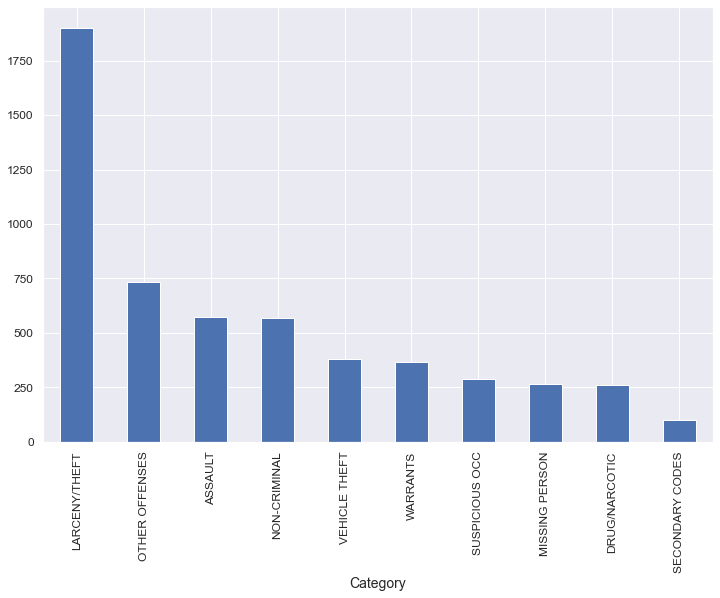

In [20]:
df_category.nlargest(10).plot(kind = "bar", figsize=(12,8))
plt.show()

In [21]:
df_des = df.groupby(["Descript"], as_index=True)["IncidntNum"].count()
df_des.to_frame()

,IncidntNum
Descript,
ACTS AGAINST PUBLIC TRANSIT,1
AGGRAVATED ASSAULT WITH A DEADLY WEAPON,63
AGGRAVATED ASSAULT WITH A GUN,6
AGGRAVATED ASSAULT WITH A KNIFE,22
AGGRAVATED ASSAULT WITH BODILY FORCE,46
...,...
VIOLATION OF PARK CODE,5
VIOLATION OF RESTRAINING ORDER,26
VIOLATION OF STAY AWAY ORDER,5


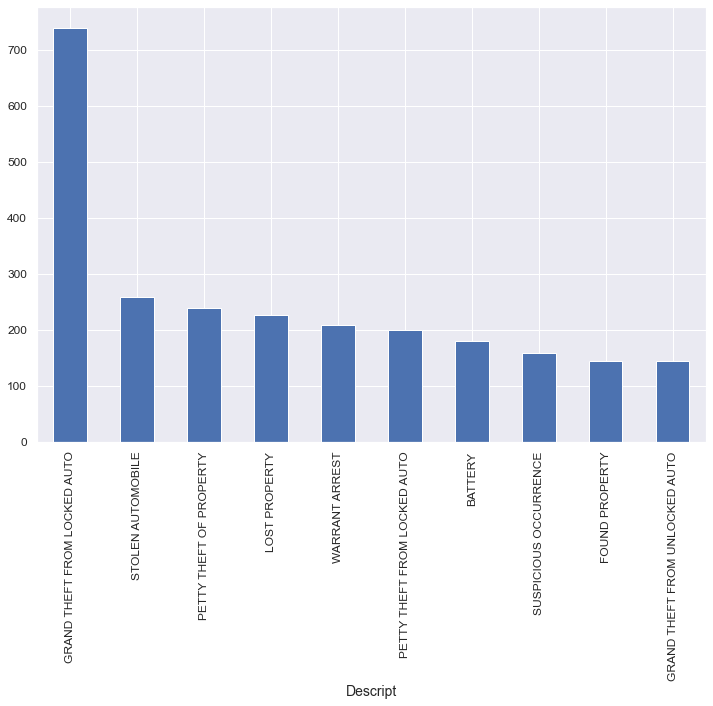

In [22]:
df_des.nlargest(10).plot(kind = "bar", figsize=(12,8))
plt.show()

In [23]:
df_day = df.groupby(["DayOfWeek"], as_index=True)["IncidntNum"].count()
df_day

DayOfWeek
Friday       868
Monday       773
Saturday     879
Sunday       832
Thursday     793
Tuesday      818
Wednesday    836
Name: IncidntNum, dtype: int64

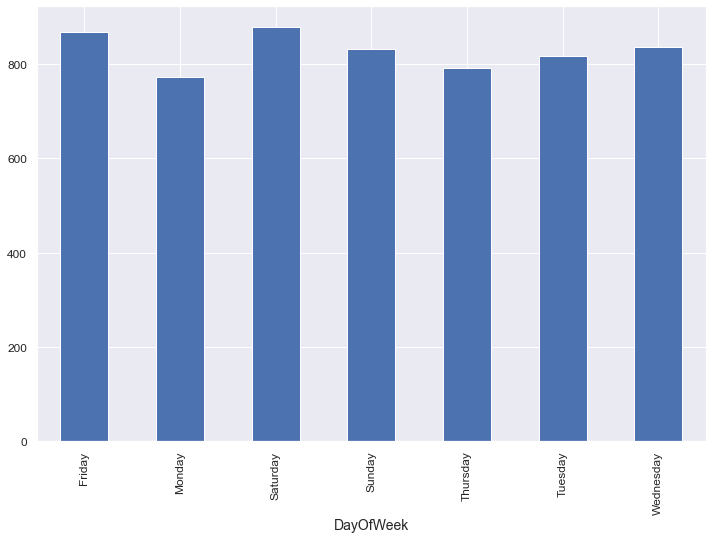

In [24]:
df_day.plot(kind = "bar", figsize=(12,8))
plt.show()

In [25]:
df_date = df.groupby(["Date"], as_index=True)["IncidntNum"].count()
df_date

Date
2014-06-01    63
2014-06-02    67
2014-06-03    57
2014-06-04    95
2014-06-05    78
              ..
2014-08-27    65
2014-08-28    50
2014-08-29    75
2014-08-30    64
2014-08-31    54
Name: IncidntNum, Length: 92, dtype: int64

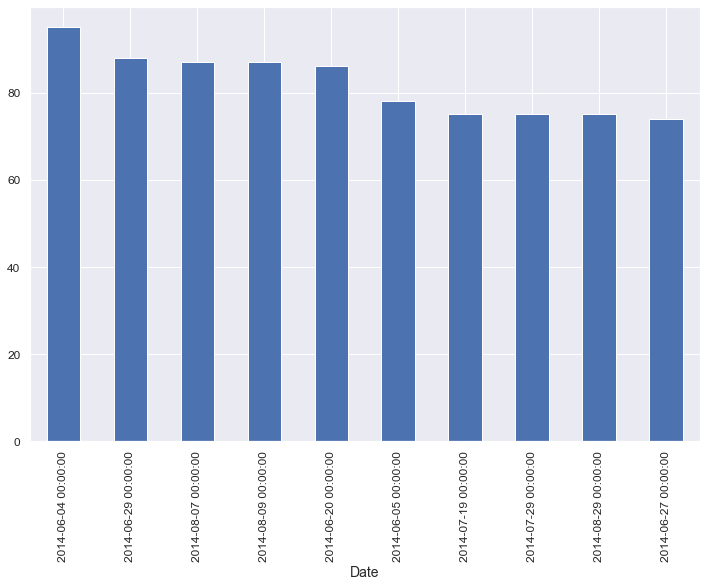

In [26]:
df_date.nlargest(10).plot(kind = "bar", figsize=(12,8))
plt.show()

In [27]:
df.groupby(["Time"], as_index=True)["IncidntNum"].count()

Time
00:01    126
00:02      4
00:03      2
00:05      5
00:06      1
        ... 
23:54      3
23:55      5
23:56      2
23:58      1
23:59      3
Name: IncidntNum, Length: 1037, dtype: int64

In [28]:
# df_des.nlargest(10).plot(kind = "bar", figsize=(12,8))
# plt.show()

In [29]:
df.groupby(["PdDistrict"], as_index=True)["IncidntNum"].count()

PdDistrict
BAYVIEW        552
CENTRAL        687
INGLESIDE      449
MISSION        758
NORTHERN       739
PARK           329
RICHMOND       290
SOUTHERN      1124
TARAVAL        391
TENDERLOIN     480
Name: IncidntNum, dtype: int64

In [30]:
# df_des.nlargest(10).plot(kind = "bar", figsize=(12,8))
# plt.show()

In [31]:
df.groupby(["Resolution"], as_index=True)["IncidntNum"].count()

Resolution
ARREST, BOOKED                            1293
ARREST, CITED                              280
CLEARED-CONTACT JUVENILE FOR MORE INFO       3
COMPLAINANT REFUSES TO PROSECUTE            17
DISTRICT ATTORNEY REFUSES TO PROSECUTE       6
EXCEPTIONAL CLEARANCE                       14
JUVENILE ADMONISHED                          1
JUVENILE BOOKED                             23
JUVENILE CITED                              18
JUVENILE DIVERTED                            1
LOCATED                                    222
NONE                                      3828
NOT PROSECUTED                               7
PROSECUTED BY OUTSIDE AGENCY                 9
PSYCHOPATHIC CASE                           19
UNFOUNDED                                   58
Name: IncidntNum, dtype: int64

In [32]:
# df_des.nlargest(10).plot(kind = "bar", figsize=(12,8))
# plt.show()